# Random Walker on Principal Component Analysis

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Generating Trajectories of Random Walker Policy

In [2]:
def random_policy():
    k = np.random.rand()
    x_dir = math.cos(k * 2 * math.pi)
    y_dir = math.sin(k * 2 * math.pi)
    return np.array([x_dir, y_dir])

In [3]:
class TwoDimNavigation:
    def __init__(self):
        self.current_position = np.array([0.0, 0.0])
        self.magnitude = 2.0
        
    def state(self):
        return np.array([self.current_position[0], self.current_position[1]])
        
    def step(self, action):
        """
        action should be a 2 dimensional directional vector
        """
        length = math.sqrt(action[0] ** 2 + action[1] ** 2)
        step_direction = np.array([action[0] / length, action[1] / length])
        self.current_position += step_direction * self.magnitude
        return self.current_position
        
    def reset(self):
        self.current_position = np.array([0.0, 0.0])
        return self.current_position

In [4]:
max_iter = 100
sample_size = 100
env = TwoDimNavigation()
trajectories = np.zeros((max_iter, 2, sample_size))
trajectories_dataset = np.zeros((max_iter, sample_size * 4)) # for PCA

for i in range(max_iter):
    env.reset()
    for t in range(sample_size):
        obs = env.state()
        action = random_policy()
        env.step(action)
        for j in range(len(obs)):
            trajectories[i][j][t] = obs[j]
            trajectories_dataset[i][4 * t + j] = obs[j]
        for j in range(len(action)):
            trajectories_dataset[i][4 * t + j + len(obs)] = action[j]

In [5]:
print(trajectories[0][0][:5])
print(trajectories[0][1][:5])
print(trajectories_dataset.shape) # a set of 2-dim state and 2-dim action
print(trajectories_dataset[0][:4])
print(trajectories_dataset[0][4:8])

[0.         1.73980245 0.49436527 2.22617968 3.83244762]
[ 0.         -0.98645194 -2.5513437  -1.55093435 -2.74253131]
(100, 400)
[ 0.          0.          0.86990123 -0.49322597]
[ 1.73980245 -0.98645194 -0.62271859 -0.78244588]


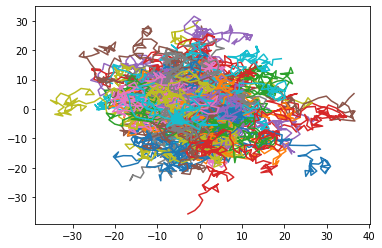

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(len(trajectories_dataset)):
    ax.plot(trajectories[i][0], trajectories[i][1])
plt.show()

## PCA on the Trajectories Dataset

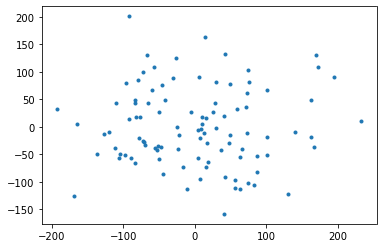

In [7]:
pca = PCA(n_components=2)
pca_eigenvectors = pca.fit_transform(trajectories_dataset)
plt.scatter(pca_eigenvectors[:, 0], pca_eigenvectors[:, 1], marker=".")

### Eigenvectors for the first 2 principal components

In [8]:
pca.components_

array([[-1.59907875e-16, -1.01317600e-17,  1.00025927e-03,
        -1.46509523e-03,  2.00051854e-03, -2.93019046e-03,
         1.20583866e-03, -1.50949807e-03,  4.41219586e-03,
        -5.94918661e-03,  8.69534316e-04, -1.35175654e-03,
         6.15126449e-03, -8.65269969e-03,  1.76873631e-03,
        -1.25521904e-03,  9.68873711e-03, -1.11631378e-02,
         1.15596027e-03, -7.22201695e-05,  1.20006576e-02,
        -1.13075781e-02, -5.68429245e-05, -1.48614199e-03,
         1.18869718e-02, -1.42798621e-02,  6.78380886e-04,
         7.66634223e-05,  1.32437336e-02, -1.41265352e-02,
        -1.54662753e-03,  3.73928265e-04,  1.01504785e-02,
        -1.33786787e-02,  1.95363188e-03, -6.60779725e-04,
         1.40577423e-02, -1.47002382e-02,  9.22291183e-04,
         3.00270547e-04,  1.59023246e-02, -1.40996971e-02,
        -4.13136976e-04,  8.31055633e-05,  1.50760507e-02,
        -1.39334859e-02, -1.31796182e-04, -1.44247850e-03,
         1.48124583e-02, -1.68184429e-02, -3.90451106e-0

### Trajectory determined from the sequence of states in the eigenvectors

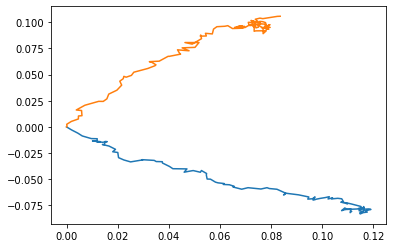

In [9]:
pca_comp_states_only = np.zeros((len(pca.components_), 2, sample_size))
for i in range(len(pca.components_)):
    for t in range(sample_size):
        pca_comp_states_only[i][0][t] = pca.components_[i][4 * t]
        pca_comp_states_only[i][1][t] = pca.components_[i][4 * t + 1]
        
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(len(pca_comp_states_only)):
    ax.plot(pca_comp_states_only[i][0], pca_comp_states_only[i][1])
plt.show()

### Trajectory determined from the sequence of actions in the eigenvectors

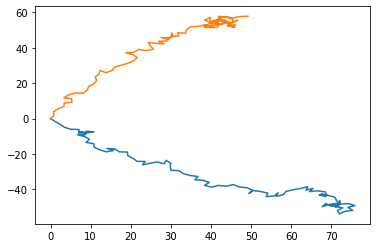

In [11]:
env = TwoDimNavigation()
pca_comp_action_oriented = np.zeros((len(pca.components_), 2, sample_size))
for i in range(len(pca.components_)):
    obs = env.reset()
    for t in range(sample_size):
        pca_comp_action_oriented[i][0][t] = obs[0]
        pca_comp_action_oriented[i][1][t] = obs[1]
        obs = env.step(np.array([pca.components_[i][4 * t + 2], pca.components_[i][4 * t + 3]]))
        
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(len(pca_comp_states_only)):
    ax.plot(pca_comp_action_oriented[i][0], pca_comp_action_oriented[i][1])
plt.show()